Họ tên : Hoàng Tiến Anh

MSSV : 21068521

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

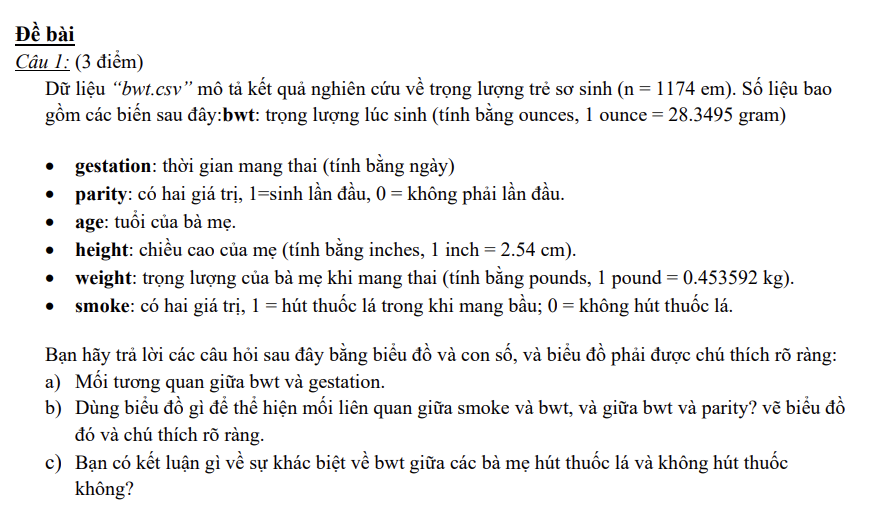

## Câu 1

In [75]:
df = pd.read_csv('bwt.csv')
df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bwt        1174 non-null   int64
 1   gestation  1174 non-null   int64
 2   parity     1174 non-null   int64
 3   age        1174 non-null   int64
 4   height     1174 non-null   int64
 5   weight     1174 non-null   int64
 6   smoke      1174 non-null   int64
dtypes: int64(7)
memory usage: 64.3 KB


In [77]:
#a) Mối tương quan giữa bwt avf gestation

In [78]:
# Tính hệ số tương quan Pearson
r = np.corrcoef(df["gestation"], df["bwt"])[0][1]

# Tính độ lệch chuẩn tương quan
r_sq = r**2

print("Hệ số tương quan Pearson:", r)
print("Độ lệch chuẩn tương quan:", r_sq)


Hệ số tương quan Pearson: 0.40754279338885097
Độ lệch chuẩn tương quan: 0.16609112844318766


In [79]:
df.corr()

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.407543,-0.043908,0.026983,0.203704,0.155923,-0.246800
gestation,0.407543,1.000000,0.080916,-0.053425,0.070470,0.023655,-0.060267
parity,-0.043908,0.080916,1.000000,-0.351041,0.043543,-0.096362,-0.009599
age,0.026983,-0.053425,-0.351041,1.000000,-0.006453,0.147322,-0.067772
height,0.203704,0.070470,0.043543,-0.006453,1.000000,0.435287,0.017507
weight,0.155923,0.023655,-0.096362,0.147322,0.435287,1.000000,-0.060281
smoke,-0.246800,-0.060267,-0.009599,-0.067772,0.017507,-0.060281,1.000000


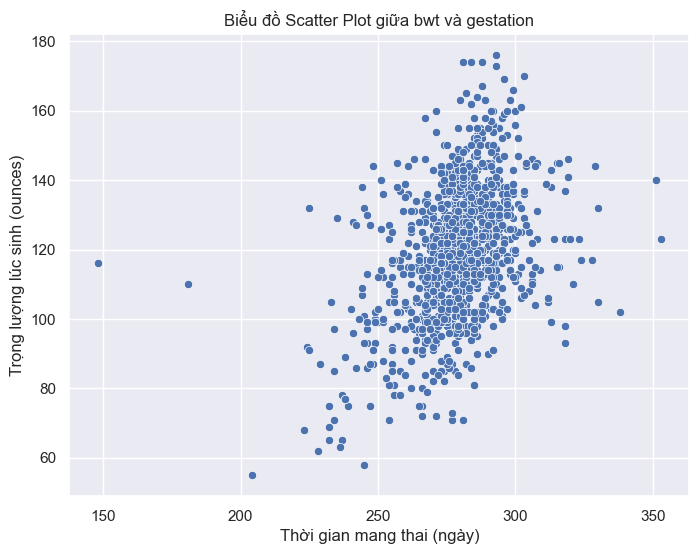

In [80]:
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="gestation", y="bwt", data=df)
plt.title('Biểu đồ Scatter Plot giữa bwt và gestation')
plt.xlabel('Thời gian mang thai (ngày)')
plt.ylabel('Trọng lượng lúc sinh (ounces)')
plt.show()

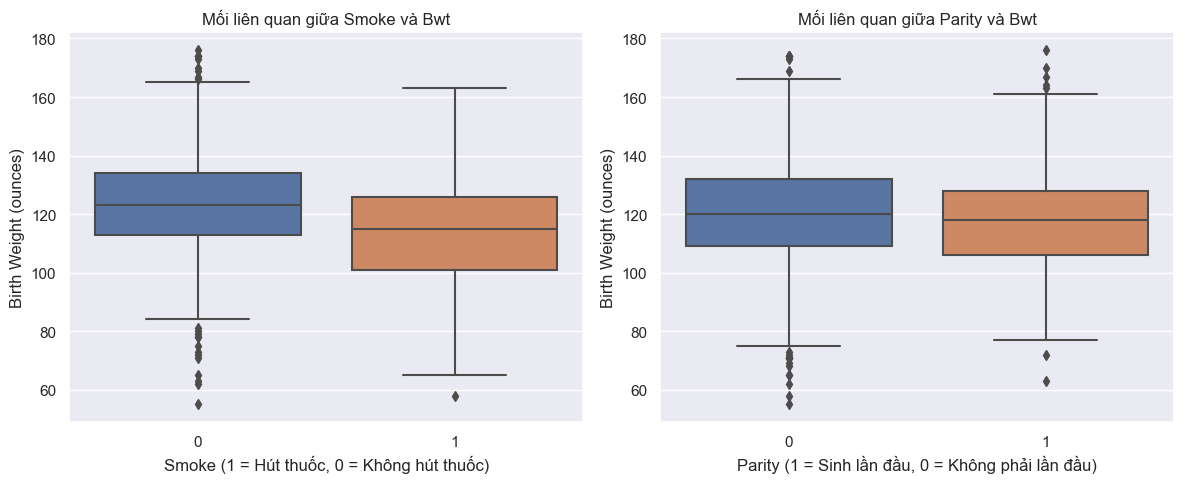

In [81]:
# b ) sử dụng boxplot
# Biểu đồ Boxplot cho mối liên quan giữa smoke và bwt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='smoke', y='bwt', data=df)
plt.title('Mối liên quan giữa Smoke và Bwt')
plt.xlabel('Smoke (1 = Hút thuốc, 0 = Không hút thuốc)')
plt.ylabel('Birth Weight (ounces)')

# Biểu đồ Boxplot cho mối liên quan giữa parity và bwt
plt.subplot(1, 2, 2)
sns.boxplot(x='parity', y='bwt', data=df)
plt.title('Mối liên quan giữa Parity và Bwt')
plt.xlabel('Parity (1 = Sinh lần đầu, 0 = Không phải lần đầu)')
plt.ylabel('Birth Weight (ounces)')

plt.tight_layout()
plt.show()


In [82]:
#c )
# Trung bình trọng lượng lúc sinh cho bà mẹ hút thuốc lá
smoking_bwt_mean = df[df['smoke'] == 1]['bwt'].mean()

# Trung bình trọng lượng lúc sinh cho bà mẹ không hút thuốc lá
non_smoking_bwt_mean = df[df['smoke'] == 0]['bwt'].mean()

print(f"Trung bình bwt cho bà mẹ hút thuốc lá: {smoking_bwt_mean:.2f} ounces")
print(f"Trung bình bwt cho bà mẹ không hút thuốc lá: {non_smoking_bwt_mean:.2f} ounces")


Trung bình bwt cho bà mẹ hút thuốc lá: 113.82 ounces
Trung bình bwt cho bà mẹ không hút thuốc lá: 123.09 ounces


Nhận xét : ta có thể thấy rằng trẻ sơ sinh sinh ra từ các bà mẹ hút thuốc lá có trọng lượng lúc sinh thấp hơn so với trẻ sơ sinh sinh ra từ các bà mẹ không hút thuốc lá

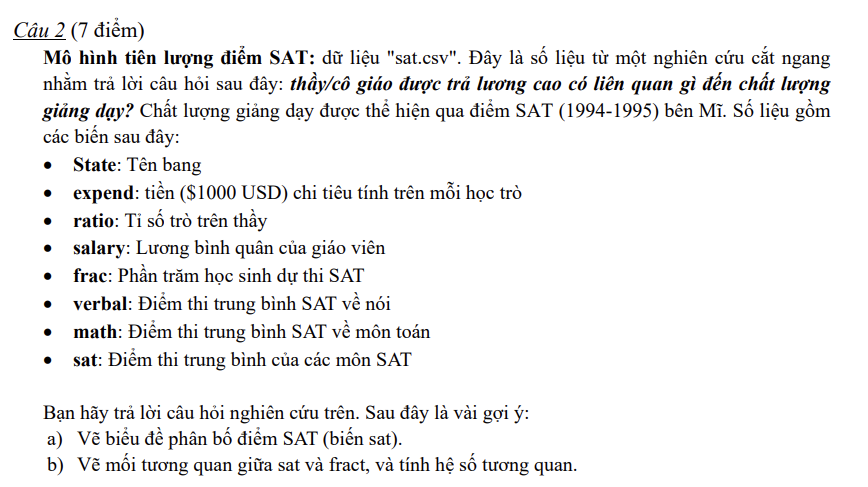
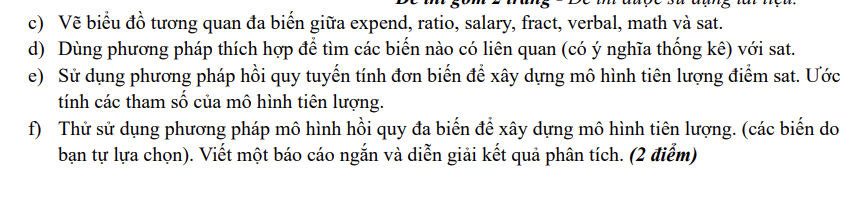

In [83]:
data = pd.read_csv('sat.csv')
data.head()

,State,expend,ratio,salary,frac,verbal,math,sat
0,Alabama,4.405,17.2,31.144,8,491,538,1029
1,Alaska,8.963,17.6,47.951,47,445,489,934
2,Arizona,4.778,19.3,32.175,27,448,496,944
3,Arkansas,4.459,17.1,28.934,6,482,523,1005
4,California,4.992,24.0,41.078,45,417,485,902


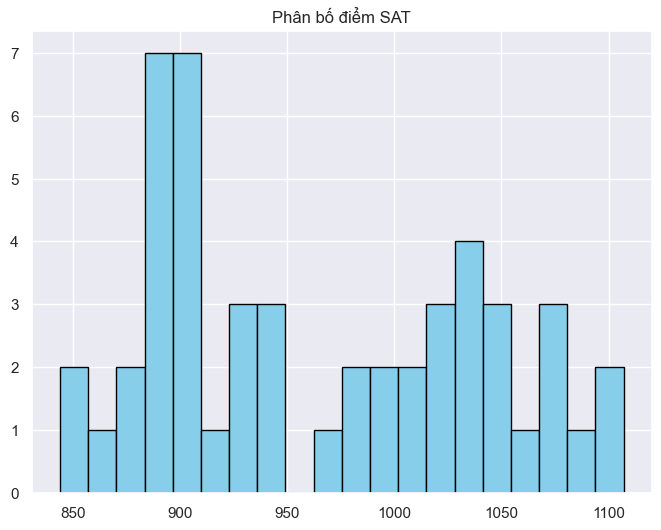

In [84]:
# Phân bố điểm SAT
plt.figure(figsize=(8, 6))
plt.hist(data["sat"], bins=20, color='skyblue', edgecolor='black')
plt.title("Phân bố điểm SAT")
plt.show()


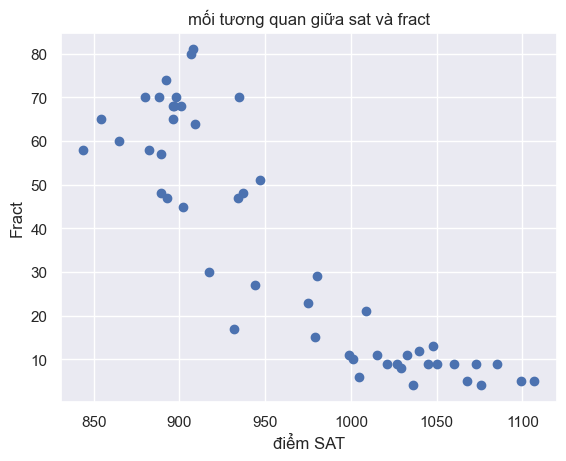

In [85]:
# b) Vẽ mối tương quan giữa sat và fract, và tính hệ số tương quan. 
plt.scatter(x = data['sat'] , y = data['frac'])
plt.xlabel('điểm SAT')
plt.ylabel('Fract')
plt.title('mối tương quan giữa sat và fract')
plt.show()

In [86]:
print("Hệ số tương quan giữa sat và frac là :", data.corr()['sat']['frac'])

Hệ số tương quan giữa sat và frac là : -0.88711867563963


In [87]:
#c) Vẽ biểu đồ tương quan đa biến giữa expend, ratio, salary, fract, verbal, math và sat. 

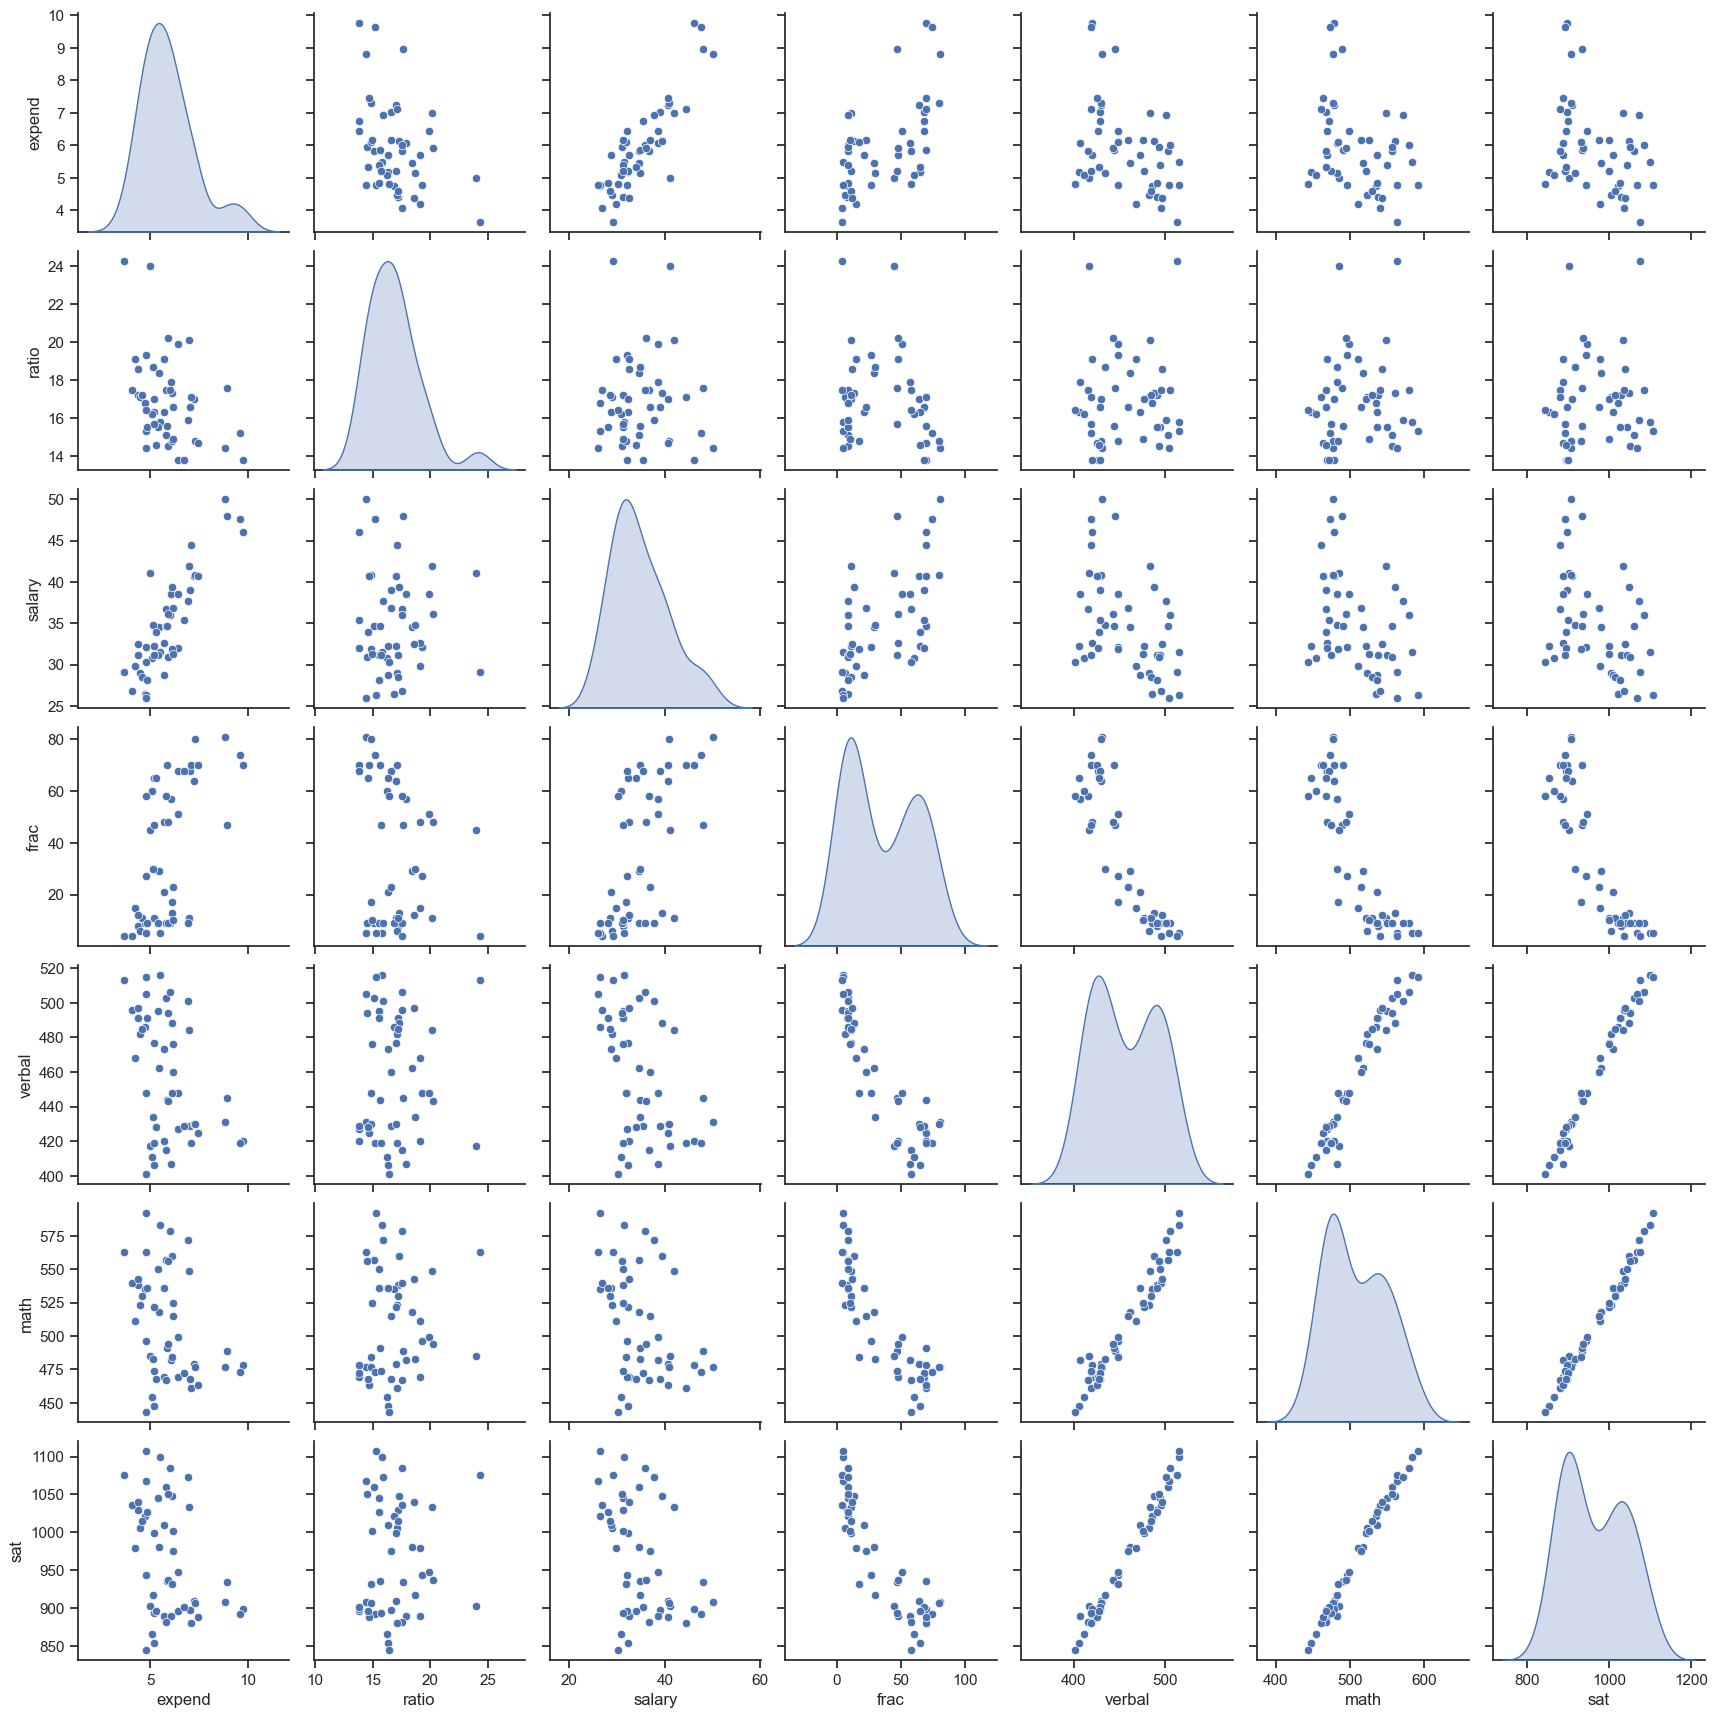

In [88]:
# Chọn các biến cần phân tích
variables = ["expend", "ratio", "salary", "frac", "verbal", "math", "sat"]

# Vẽ biểu đồ scatter matrix
sns.set(style="ticks")
sns.pairplot(data[variables], diag_kind="kde")
plt.show()


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   50 non-null     object 
 1   expend  50 non-null     float64
 2   ratio   50 non-null     float64
 3   salary  50 non-null     float64
 4   frac    50 non-null     int64  
 5   verbal  50 non-null     int64  
 6   math    50 non-null     int64  
 7   sat     50 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 3.2+ KB


In [90]:
# d) Dùng phương pháp thích hợp để tìm các biến nào có liên quan (có ý nghĩa thống kê) với sat.
from scipy import stats

# Tính hệ số tương quan và p-value cho từng biến với "sat"
correlation_results = []
for column in data.columns[1:]:
    if column != "sat":
        r, p_value = stats.pearsonr(data[column], data["sat"])
        correlation_results.append((column, r, p_value))

# Sắp xếp kết quả theo giá trị tuyệt đối của hệ số tương quan
correlation_results.sort(key=lambda x: abs(x[1]), reverse=True)

# In kết quả
for result in correlation_results:
    variable, r, p_value = result
    print(f"{variable}: Pearson's r = {r:.4f}, p-value = {p_value:.4f}")


math: Pearson's r = 0.9935, p-value = 0.0000
verbal: Pearson's r = 0.9915, p-value = 0.0000
frac: Pearson's r = -0.8871, p-value = 0.0000
salary: Pearson's r = -0.4399, p-value = 0.0014
expend: Pearson's r = -0.3805, p-value = 0.0064
ratio: Pearson's r = 0.0813, p-value = 0.5748


Biến với hệ số tương quan cao và p-value thấp (< 0.05) thường được coi là có mối quan hệ ý nghĩa thống kê với "sat.".

Nên chỉ có biến `ratio` là **không** có ý nghĩa thống kê với `sat`

Intercept (hệ số chặn): 25.24
Slope (hệ số góc): 1.85


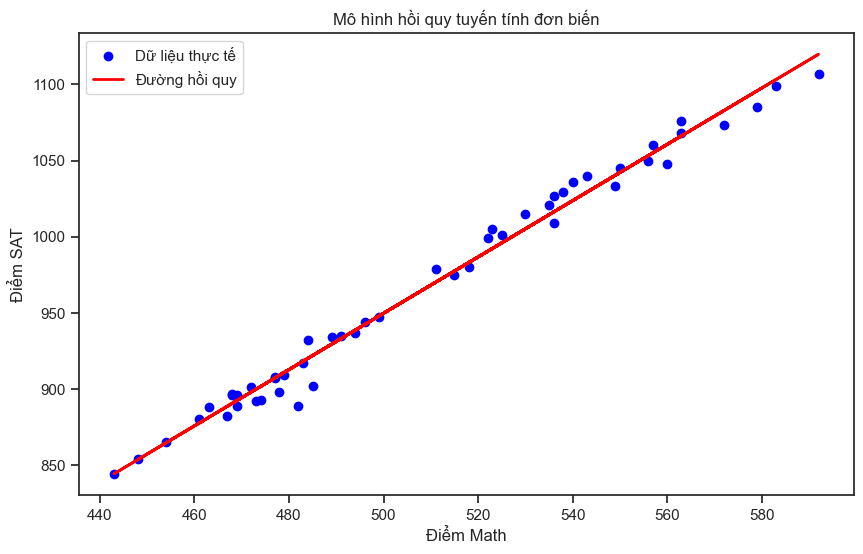

In [91]:
# e) Sử dụng phương pháp hồi quy tuyến tính đơn biến để xây dựng mô hình tiên lượng điểm sat. Ước tính các tham số của mô hình tiên lượng
from sklearn.linear_model import LinearRegression

# Chuẩn bị dữ liệu
X = data['math'].values.reshape(-1, 1)  # Biến độc lập (điểm toán)
y = data['sat'].values  # Biến phụ thuộc (điểm SAT)

# Tạo mô hình hồi quy tuyến tính đơn biến
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X, y)

# Lấy các tham số của mô hình
intercept = model.intercept_
slope = model.coef_[0]

# In các tham số của mô hình
print(f"Intercept (hệ số chặn): {intercept:.2f}")
print(f"Slope (hệ số góc): {slope:.2f}")

# Dự đoán điểm SAT dựa trên mô hình
y_pred = model.predict(X)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')  # Dữ liệu thực tế
plt.plot(X, y_pred, color='red', linewidth=2, label='Đường hồi quy')  # Đường hồi quy
plt.xlabel('Điểm Math')
plt.ylabel('Điểm SAT')
plt.title('Mô hình hồi quy tuyến tính đơn biến')
plt.legend()
plt.show()


**f) Thử sử dụng phương pháp mô hình hồi quy đa biến để xây dựng mô hình tiên lượng. (các biến do 
bạn tự lựa chọn). Viết một báo cáo ngắn và diễn giải kết quả phân tích.**


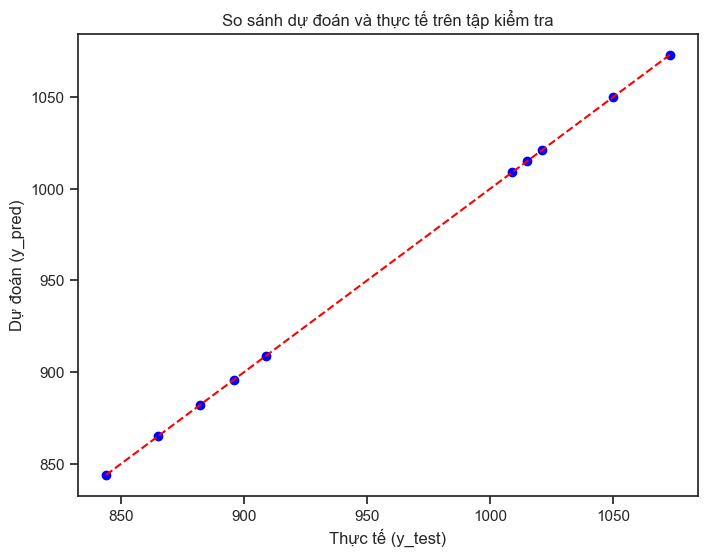

In [92]:
from sklearn.model_selection import train_test_split

independent_vars = ['expend', 'ratio', 'salary', 'frac', 'verbal', 'math']
X = data[independent_vars]
y = data['sat']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy đa biến
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán điểm SAT trên tập kiểm tra
y_pred = model.predict(X_test)


# Vẽ biểu đồ so sánh dự đoán và thực tế trên tập kiểm tra
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Thực tế (y_test)')
plt.ylabel('Dự đoán (y_pred)')
plt.title('So sánh dự đoán và thực tế trên tập kiểm tra')
plt.show()


In [93]:
from sklearn.metrics import mean_squared_error, r2_score

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# In kết quả
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00



**Báo Cáo: Dự Đoán Điểm SAT Sử Dụng Mô Hình Hồi Quy Đa Biến**

**Mục Tiêu Nghiên Cứu:**
- Mục tiêu của nghiên cứu này là xây dựng một mô hình hồi quy đa biến để dự đoán điểm SAT dựa trên các biến độc lập, bao gồm expend, ratio, salary, frac, verbal và math.

**Phương Pháp:**
- Dữ liệu được đọc từ tập tin "sat.csv" chứa thông tin về các biến độc lập và biến phụ thuộc.
- Chúng ta đã chia dữ liệu thành tập huấn luyện (train set) và tập kiểm tra (test set) với tỷ lệ 80% - 20% để đào tạo và đánh giá mô hình.
- Mô hình hồi quy tuyến tính đa biến đã được xây dựng bằng cách sử dụng thư viện scikit-learn.

**Kết Quả:**
- Sau khi xây dựng mô hình, chúng ta đã thu được các hệ số hồi quy tương ứng với các biến độc lập, bao gồm hệ số chặn (intercept) và hệ số góc (coefficients) cho từng biến.
- Kết quả của mô hình được đánh giá bằng hai độ đo:
  1. Mean Squared Error (MSE): MSE đo lường sai số trung bình bình phương giữa dự đoán và giá trị thực tế. Giá trị MSE cho biết mức độ sai lệch giữa dự đoán và thực tế, với giá trị càng thấp càng tốt.
  2. R-squared (R2): R2 đo lường mức độ biểu diễn của mô hình đối với dữ liệu. Giá trị R2 càng cao thì mô hình càng phù hợp với dữ liệu.

**Kết Luận:**
- Mô hình hồi quy đa biến đã được xây dựng để dự đoán điểm SAT dựa trên các biến độc lập.
- Kết quả đánh giá mô hình cho thấy giá trị MSE và R2, cho biết mức độ phù hợp của mô hình. Thông qua phân tích kết quả này, chúng ta có thể đánh giá mức độ hiệu quả của mô hình trong việc tiên lượng điểm SAT.
